<a href="https://colab.research.google.com/github/satyamgipu/Iplt20analysis/blob/master/IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [71]:
path="/content/drive/My Drive/"
teams=pd.read_csv(path+"teams.csv")
match=pd.read_csv(path+"matches.csv")
Players=pd.read_excel(path+"Players.xlsx")
deliveries=pd.read_csv(path+"deliveries.csv")
teamwise_home_and_away=pd.read_csv(path+"teamwise_home_and_away.csv")
teams=pd.read_csv(path+"teams.csv")
most_runs_average_strikerate=pd.read_csv(path+"most_runs_average_strikerate.csv")



TOSS Vs winners

In [34]:
Players.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [35]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


In [36]:
most_runs_average_strikerate.head(1)

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351


In [37]:
teamwise_home_and_away.head(1)

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.5,62.5


In [38]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [39]:
Players.head(1)

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India


In [40]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [41]:
match.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,innings_winner
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1


In [42]:
deliveries.loc[deliveries["dismissal_kind"].notna(),:].groupby("dismissal_kind").agg({"dismissal_kind":"count"})

,dismissal_kind
dismissal_kind,
bowled,1579
caught,5332
caught and bowled,211
hit wicket,10
lbw,539
obstructing the field,2
retired hurt,12
run out,848
stumped,278


In [43]:
players_dismissed_type=deliveries.loc[deliveries["dismissal_kind"].notna(),:].groupby(["match_id","inning","dismissal_kind"]).agg({"dismissal_kind":"count"})

In [44]:
deliveries.loc[deliveries["dismissal_kind"].notna(),:]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,0,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,0,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179019,11415,2,Chennai Super Kings,Mumbai Indians,11,3,AT Rayudu,SR Watson,JJ Bumrah,0,0,0,0,0,0,0,0,0,AT Rayudu,caught,Q de Kock
179033,11415,2,Chennai Super Kings,Mumbai Indians,13,5,SR Watson,MS Dhoni,HH Pandya,0,0,0,0,0,0,1,0,1,MS Dhoni,run out,Ishan Kishan
179067,11415,2,Chennai Super Kings,Mumbai Indians,19,2,DJ Bravo,SR Watson,JJ Bumrah,0,0,0,0,0,0,0,0,0,DJ Bravo,caught,Q de Kock
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya


In [72]:
match_id_with_no_result=list(match[match["result"]=="no result"].id)
match_id_with_no_result

[301, 546, 571, 11340]

In [46]:
match=match[~match["id"].isin(match_id_with_no_result)]
deliveries=deliveries[~deliveries["match_id"].isin(match_id_with_no_result)]

In [47]:
match[match["id"]==546]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,innings_winner


In [48]:
def inning_finder(winner,toss_decision,toss_winner):
  """ function return in which inning  a team wins the match""" 
  innings_winner=0
  if toss_winner==winner and toss_decision=="field":
    innings_winner=2
  elif toss_winner==winner and toss_decision=="bat":
    innings_winner=1
  elif toss_winner!=winner and toss_decision=="bat":
    innings_winner=2
  elif toss_winner!=winner and toss_decision=="field":
    innings_winner=1
  return innings_winner
match["innings_winner"]=match.apply(lambda x: inning_finder(x["winner"],x["toss_decision"],x["toss_winner"]),
                                                                                axis=1)

In [49]:
match

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,innings_winner
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,2
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,2
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,2
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,2


In [50]:
inning_wise_extra_runs=pd.DataFrame(deliveries.groupby(["match_id","inning"]).agg({"extra_runs":"sum"}))


In [51]:
inning_wise_extra_runs.shape

(1522, 1)

In [52]:
inning_wise_extra_runs=inning_wise_extra_runs.reset_index()

In [53]:
inning_wise_extra_runs.drop(inning_wise_extra_runs[inning_wise_extra_runs["inning"]>2].index,inplace=True )

In [54]:
inning_wise_extra_runs

,match_id,inning,extra_runs
0,1,1,7
1,1,2,6
2,2,1,8
3,2,2,4
4,3,1,4
...,...,...,...
1517,11413,2,5
1518,11414,1,8
1519,11414,2,11
1520,11415,1,3


In [55]:
def inning_wise_wins(x,temp=match):
 """ function return the wins or loose of the match based on the index and the inning with the help of match dataframe which is set as default """
 if int(match.loc[match["id"]==x["match_id"]]["innings_winner"])==x["inning"]:
     return "wins"
 else:
     return "Loose"
inning_wise_extra_runs["win_Loose"]=inning_wise_extra_runs.apply(lambda x: inning_wise_wins(x),axis=1)

In [56]:
inning_wise_extra_runs

,match_id,inning,extra_runs,win_Loose
0,1,1,7,wins
1,1,2,6,Loose
2,2,1,8,Loose
3,2,2,4,wins
4,3,1,4,Loose
...,...,...,...,...
1517,11413,2,5,wins
1518,11414,1,8,Loose
1519,11414,2,11,wins
1520,11415,1,3,wins


In [57]:
match

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,innings_winner
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,2
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,2
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,2
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,2


In [58]:
Loose_Count=inning_wise_extra_runs[inning_wise_extra_runs["win_Loose"]=="Loose"].shape[0]
Loose_Count

752

In [59]:
win_Count=inning_wise_extra_runs[inning_wise_extra_runs["win_Loose"]=="wins"].shape[0]
win_Count

752

In [60]:

total_match=inning_wise_extra_runs.shape[0]

In [61]:
wins_percentage_based_on_batting_first=win_Count/total_match
Loose_percentage_based_on_batting_first=Loose_Count/total_match
print(Loose_percentage_based_on_batting_first)
print(wins_percentage_based_on_batting_first)

0.5
0.5


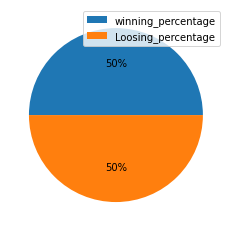

In [62]:
plt.pie([wins_percentage_based_on_batting_first,Loose_percentage_based_on_batting_first],autopct='%1.0f%%')
plt.legend(["winning_percentage","Loosing_percentage"])

In [63]:
inning_wise_extra_runs.reset_index(inplace=True)

In [64]:
inning_wise_extra_runs.shape

(1504, 5)

In [65]:
MoreXtrarunswins=0
lessXtrarunsLoose=0
independentxtraruns=0

""" code to count wins when extra runs is greater or lesser or equal"""
for i in range(0,inning_wise_extra_runs.shape[0],2):
   if (inning_wise_extra_runs.iloc[i]["extra_runs"]>inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i]["win_Loose"]=="wins":
     MoreXtrarunswins+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]<inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i+1]["win_Loose"]=="wins":
     MoreXtrarunswins+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]>inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i]["win_Loose"]=="Loose":
     lessXtrarunsLoose+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]<inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i+1]["win_Loose"]=="Loose":
     lessXtrarunsLoose+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]==inning_wise_extra_runs.iloc[i+1]["extra_runs"]):
      independentxtraruns+=1
print(MoreXtrarunswins)
print(lessXtrarunsLoose)
print(independentxtraruns)
   


353
335
64


In [66]:
XtrarunsWinsPercentage=(MoreXtrarunswins/win_Count)*100
XtrarunsWinsPercentage

46.941489361702125

In [67]:
XtrarunsLoosePercentage=(lessXtrarunsLoose/win_Count)*100
XtrarunsLoosePercentage

44.547872340425535

In [68]:
independentxtrarunspercentage=(independentxtraruns/win_Count)*100
independentxtrarunspercentage

8.51063829787234

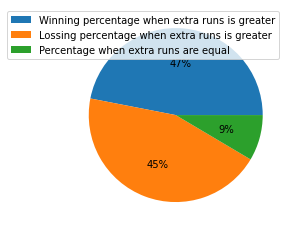

In [70]:
plt.pie([XtrarunsWinsPercentage,XtrarunsLoosePercentage,independentxtrarunspercentage],autopct='%1.0f%%')
plt.legend(["Winning percentage when extra runs is greater","Lossing percentage when extra runs is greater","Percentage when extra runs are equal"],loc=1)
